In [1]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [2]:
# Load the model
model_path = "trained-models\word2vec_model.model"
model = Word2Vec.load(model_path)


In [3]:
# Define 20 test words closely relevant to Cleantech and patents

# Define test words

test_words = [
    "renewable",
    "solar",
    "wind",
    "energy",
    "battery",
    "storage",
    "biomass",
    "sustainability",
    "emission",
    "carbon",
    "grid",
    "patent",
    "intellectual",
    "property",
    "innovation",
    "technology",
    "licensing",
    "infringement",
    "commercialization",
    "hydro",
]


# Similarity Checks


def get_similar_words(word, model):
    # Check if the word exists in the model's vocabulary
    if word in model.wv:
        # Return a list of tuples (similar_word, similarity_score)
        return model.wv.most_similar(word)
    else:
        # Return an empty list if the word is not found
        return []


# Define the analogy function
def analogy(word1, word2, word3, model):
    try:
        # Perform the analogy task
        result = model.wv.most_similar(
            positive=[word2, word3], negative=[word1], topn=1
        )
        match, score = (
            result[0][0],
            result[0][1],
        )  # Extract match and score from the top result
        return match, score
    except KeyError:
        return None, None  # Return None for both match and score if an error occurs
    except Exception as e:
        print(f"Error with words {word1}, {word2}, {word3}: {str(e)}")
        return None, None  # General error handling


In [4]:
# Evaluate Similar Words
# Dictionary comprehension to get similar words and their scores for each test word
similar_words = {word: get_similar_words(word, model) for word in test_words}


# Flatten the dictionary into a list of rows for DataFrame creation
rows = []
for word, similarities in similar_words.items():
    for similar, score in similarities:
        rows.append({"Word": word, "Similar Word": similar, "Score": score})

# Create DataFrame from the list of dictionaries
similar_words_df = pd.DataFrame(rows)

# Optionally, save the DataFrame to CSV
# similar_words_df.to_csv('similar_words.csv', index=False)


In [5]:
print(similar_words_df)

          Word  Similar Word     Score
0    renewable  conglomerate  0.644580
1    renewable          sole  0.630649
2    renewable     utilizing  0.630380
3    renewable         tidal  0.612582
4    renewable        theses  0.609833
..         ...           ...       ...
145      hydro      megawatt  0.605551
146      hydro  dispatchable  0.585759
147      hydro          dinn  0.574941
148      hydro   multisource  0.571240
149      hydro   specialized  0.569424

[150 rows x 3 columns]


In [6]:
analogy_queries = [
    ("sun", "light", "wind"),
    ("car", "road", "boat"),
    ("oil", "fuel", "solar"),
    ("coal", "pollution", "wind"),
    ("electricity", "wires", "data"),
    ("engine", "car", "turbine"),
    ("earth", "land", "ocean"),
    ("plastic", "pollution", "battery"),
    ("patent", "invention", "trademark"),
    ("lawyer", "court", "engineer"),
    ("license", "permission", "patent"),
    ("chemical", "laboratory", "biomass"),
    ("carbon", "dioxide", "hydrogen"),
    ("efficiency", "machines", "sustainability"),
    ("renewable", "energy", "sustainable"),
    ("thermal", "heat", "photovoltaic"),
    ("fossil", "coal", "renewable"),
    ("nuclear", "energy", "solar"),
    ("greenhouse", "gas", "green"),
]


In [7]:
import pandas as pd

results = {}
for w1, w2, w3 in analogy_queries:
    match, score = analogy(w1, w2, w3, model)
    results[f"{w1}:{w2}::{w3}"] = {"match": match, "score": score}

# Convert results to DataFrame
results_df = pd.DataFrame.from_dict(results, orient="index")

In [8]:
results_df

,match,score
sun:light::wind,harnessing,0.527372
car:road::boat,paper,0.419255
oil:fuel::solar,absorptance,0.562983
coal:pollution::wind,breeze,0.515910
electricity:wires::data,None,NaN
engine:car::turbine,beacon,0.506544
earth:land::ocean,reef,0.517605
plastic:pollution::battery,mileage,0.570556
patent:invention::trademark,None,NaN
lawyer:court::engineer,None,NaN


In [9]:
import numpy as np

# Visualization using t-SNE
labels, tokens = zip(*[(word, model.wv[word]) for word in model.wv.index_to_key])
tsne_model = TSNE(
    perplexity=40, n_components=2, init="pca", n_iter=2500, random_state=23
)


# Convert list of tokens to numpy array
tokens_array = np.array(tokens)

# Fit and transform using the numpy array
new_values = tsne_model.fit_transform(tokens_array)

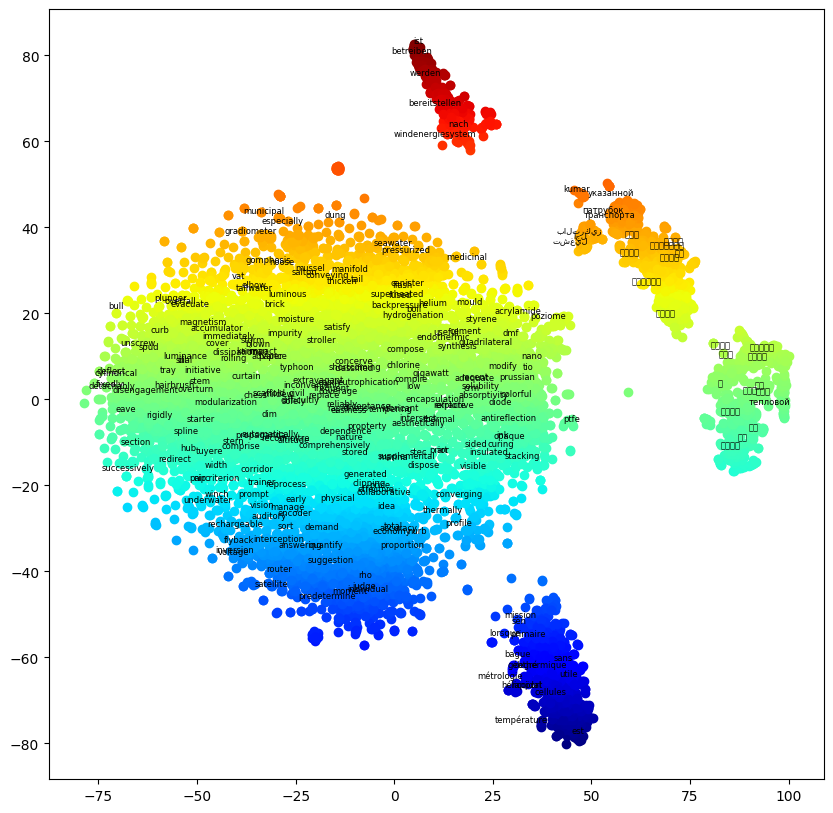

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Assume new_values and labels are already defined
plt.figure(figsize=(10, 10))
ax = plt.gca()

# Sampling and color mapping
random.seed(42)
label_display_percentage = 3
indices_to_label = random.sample(
    range(len(labels)), k=int(len(labels) * label_display_percentage / 100)
)
y_values = [i[1] for i in new_values]
colors = plt.cm.jet(
    np.interp(y_values, (min(y_values), max(y_values)), (0, 1)))

for i, (x, y) in enumerate(new_values):
    ax.scatter(x, y, color=colors[i])  # Use the colormap for points
    # Annotate only selected indices to reduce clutter
    if i in indices_to_label:
        ax.annotate(
            labels[i],
            xy=(x, y),
            xytext=(5, 2),
            textcoords="offset points",
            ha="right",
            va="bottom",
            fontsize=6,  # Smaller font size
            color="black",  # Annotation text color
        )

plt.show()

In [12]:
import plotly.graph_objs as go

# Create a trace
trace = go.Scatter(
    x=[i[0] for i in new_values],
    y=[i[1] for i in new_values],
    mode="markers+text",
    text=labels,
    marker=dict(size=5, color="blue", opacity=0.8),  # Customize dot color
    textposition="top center",
    textfont=dict(family="sans serif", size=8, color="black"),
)

# Create the layout
layout = go.Layout(
    title="t-SNE Visualization of Word Embeddings",
    xaxis=dict(title="t-SNE Dimension 1"),
    yaxis=dict(title="t-SNE Dimension 2"),
    showlegend=False,
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)
fig.update_layout(height=600, width=600)  # Adjust size to fit your needs

# Show the plot
fig.show()